# ML Experiment-6

### Dataset-1: Linear Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns=breast_cancer.feature_names)

df['target'] = y

missing_values = df.isnull().sum()

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(df_scaled_data, y, test_size=0.25, random_state=42)

In [ ]:
svm_models = {
    'linear': SVC(kernel='linear', random_state=40),
    'poly': SVC(kernel='poly', random_state=40),
    'rbf': SVC(kernel='rbf', random_state=40),
    'sigmoid': SVC(kernel='sigmoid', random_state=40)
}

for kernel, model in svm_models.items():
    model.fit(X_train, y_train)

In [ ]:
results = {}
for kernel, model in svm_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

print("\nEvaluation Results:")
for kernel, metrics in results.items():
    print(f"\n{kernel} Kernel:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Evaluation Results:

linear Kernel:
  accuracy: 0.9790
  precision: 0.9886
  recall: 0.9775
  f1_score: 0.9831

poly Kernel:
  accuracy: 0.8951
  precision: 0.8558
  recall: 1.0000
  f1_score: 0.9223

rbf Kernel:
  accuracy: 0.9720
  precision: 0.9775
  recall: 0.9775
  f1_score: 0.9775

sigmoid Kernel:
  accuracy: 0.9720
  precision: 0.9775
  recall: 0.9775
  f1_score: 0.9775


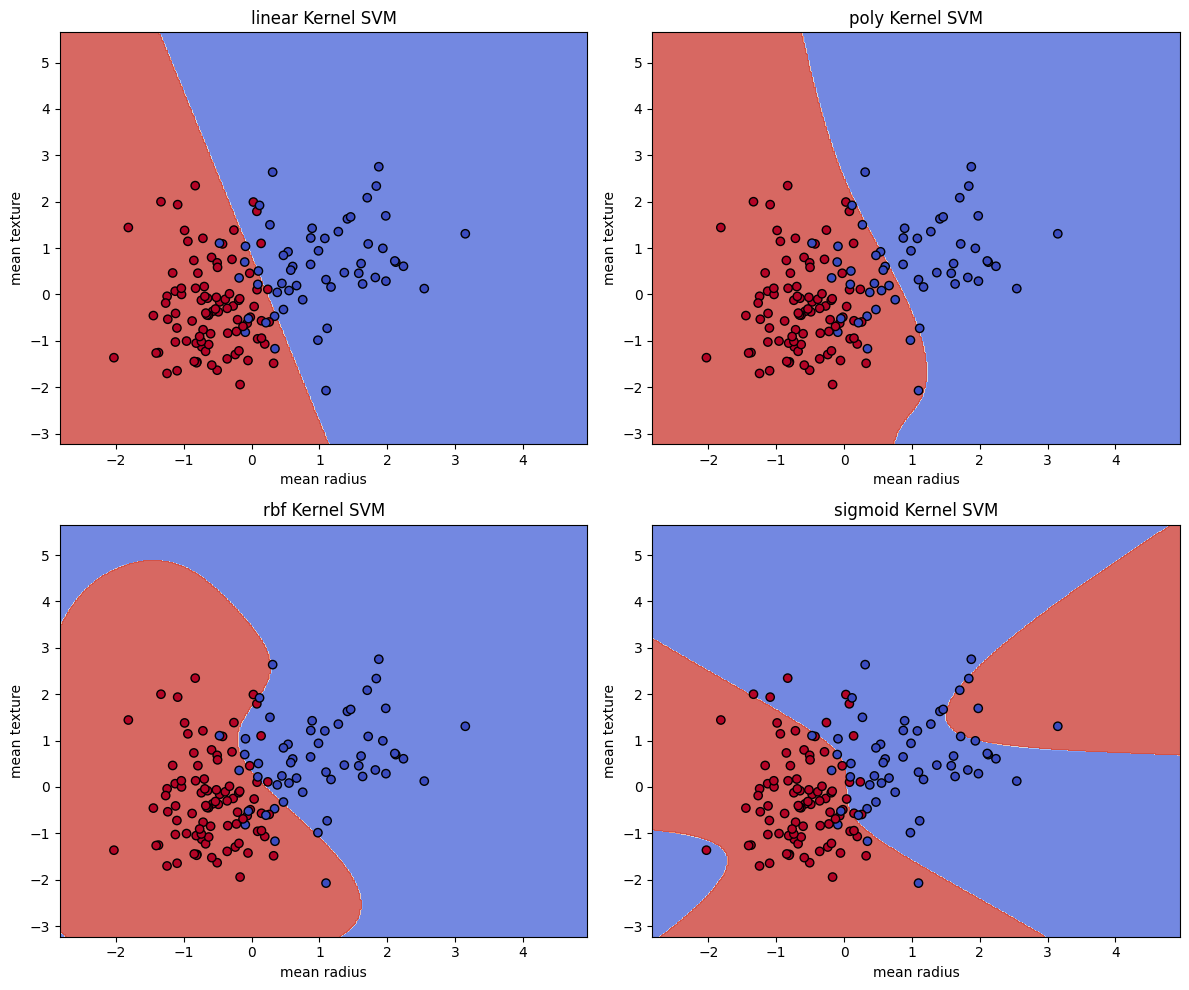

In [ ]:
feature1_index = 0
feature2_index = 1

X_train_subset = X_train.iloc[:, [feature1_index, feature2_index]]
X_test_subset = X_test.iloc[:, [feature1_index, feature2_index]]

x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (kernel, model) in enumerate(svm_models.items()):
    model.fit(X_train_subset, y_train)

    xy_meshgrid = np.c_[xx.ravel(), yy.ravel()]
    xy_dataframe = pd.DataFrame(xy_meshgrid, columns=X_train_subset.columns)

    Z = model.predict(xy_dataframe).reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    axes[i].scatter(X_test_subset.iloc[:, 0], X_test_subset.iloc[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f'{kernel} Kernel SVM')
    axes[i].set_xlabel(X_train_subset.columns[0])
    axes[i].set_ylabel(X_train_subset.columns[1])

plt.tight_layout()
plt.show()

### Dataset-2: Synthetic Dataset (using make_moons)

In [ ]:
from sklearn.datasets import make_moons

X_synth, y_synth = make_moons(n_samples=1600, noise=0.2, random_state=40)

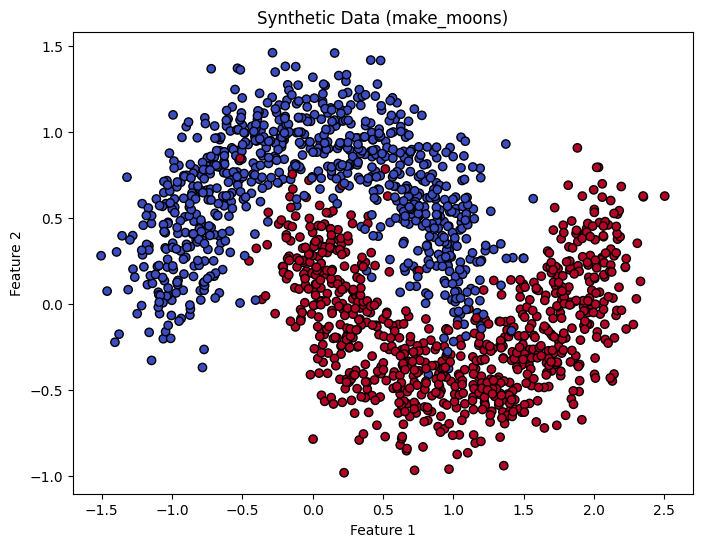

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Synthetic Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(X_synth, y_synth, test_size=0.25, random_state=42)

scaler_synth = StandardScaler()
X_train_synth = scaler_synth.fit_transform(X_train_synth)
X_test_synth = scaler_synth.transform(X_test_synth)

In [ ]:
svm_models_synth = {
    'linear': SVC(kernel='linear', random_state=40),
    'poly': SVC(kernel='poly', random_state=40),
    'rbf': SVC(kernel='rbf', random_state=40),
    'sigmoid': SVC(kernel='sigmoid', random_state=40)
}

for kernel, model in svm_models_synth.items():
    model.fit(X_train_synth, y_train_synth)

In [ ]:
results_synth = {}
for kernel, model in svm_models_synth.items():
    y_pred_synth = model.predict(X_test_synth)
    accuracy_synth = accuracy_score(y_test_synth, y_pred_synth)
    precision_synth = precision_score(y_test_synth, y_pred_synth)
    recall_synth = recall_score(y_test_synth, y_pred_synth)
    f1_synth = f1_score(y_test_synth, y_pred_synth)

    results_synth[kernel] = {
        'accuracy': accuracy_synth,
        'precision': precision_synth,
        'recall': recall_synth,
        'f1_score': f1_synth
    }

print("\nEvaluation Results (Synthetic Data):")
for kernel, metrics in results_synth.items():
    print(f"\n{kernel} Kernel:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Evaluation Results (Synthetic Data):

linear Kernel:
  accuracy: 0.8625
  precision: 0.8971
  recall: 0.8093
  f1_score: 0.8509

poly Kernel:
  accuracy: 0.8850
  precision: 0.8814
  recall: 0.8814
  f1_score: 0.8814

rbf Kernel:
  accuracy: 0.9725
  precision: 0.9692
  recall: 0.9742
  f1_score: 0.9717

sigmoid Kernel:
  accuracy: 0.6750
  precision: 0.6758
  recall: 0.6340
  f1_score: 0.6543


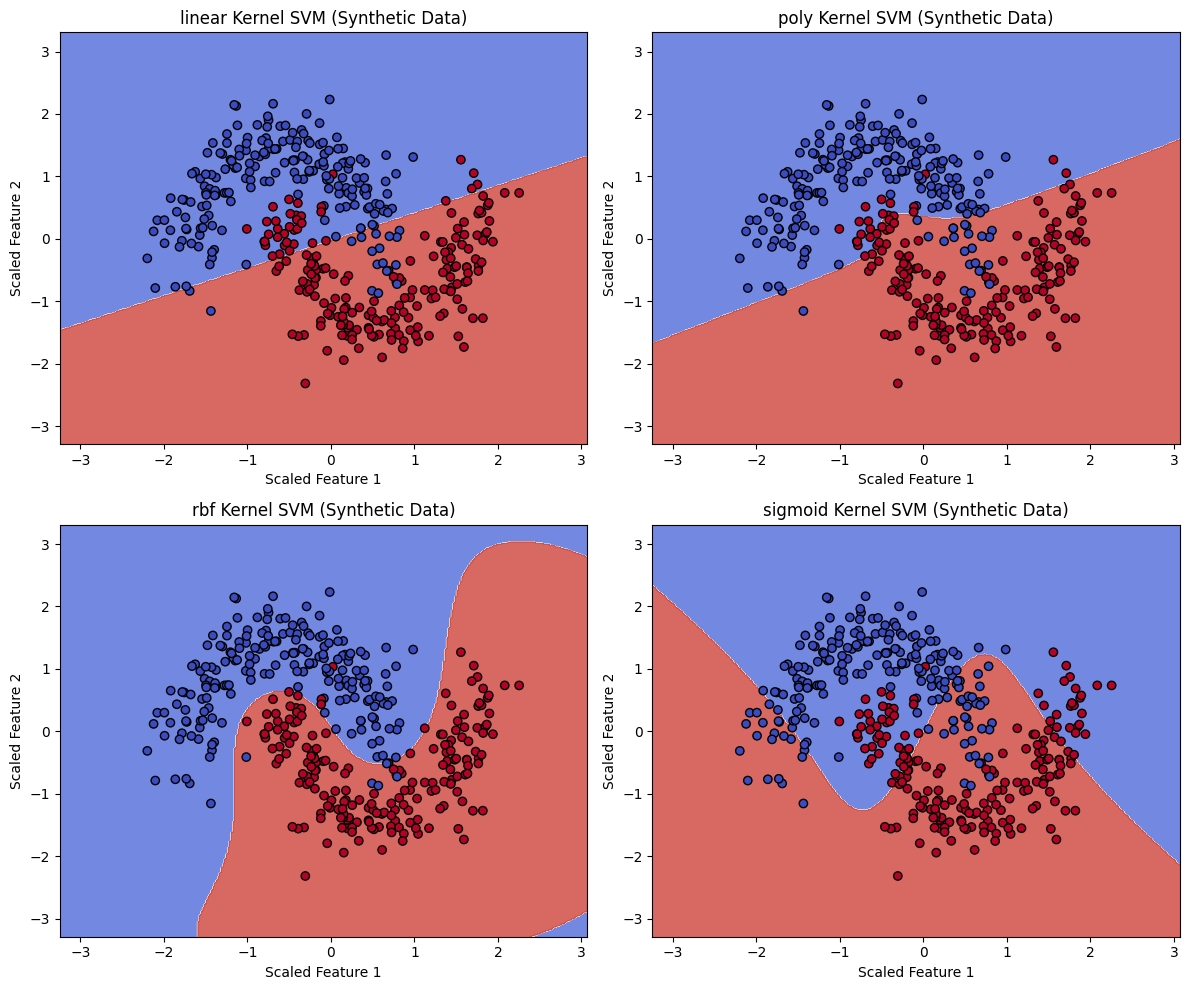

In [ ]:
x_min_synth, x_max_synth = X_train_synth[:, 0].min() - 1, X_train_synth[:, 0].max() + 1
y_min_synth, y_max_synth = X_train_synth[:, 1].min() - 1, X_train_synth[:, 1].max() + 1
xx_synth, yy_synth = np.meshgrid(np.arange(x_min_synth, x_max_synth, 0.02),
                                 np.arange(y_min_synth, y_max_synth, 0.02))

fig_synth, axes_synth = plt.subplots(2, 2, figsize=(12, 10))
axes_synth = axes_synth.ravel()

for i, (kernel, model) in enumerate(svm_models_synth.items()):
    Z_synth = model.predict(np.c_[xx_synth.ravel(), yy_synth.ravel()]).reshape(xx_synth.shape)

    axes_synth[i].contourf(xx_synth, yy_synth, Z_synth, alpha=0.8, cmap=plt.cm.coolwarm)
    axes_synth[i].scatter(X_test_synth[:, 0], X_test_synth[:, 1], c=y_test_synth, cmap=plt.cm.coolwarm, edgecolors='k')
    axes_synth[i].set_title(f'{kernel} Kernel SVM (Synthetic Data)')
    axes_synth[i].set_xlabel('Scaled Feature 1')
    axes_synth[i].set_ylabel('Scaled Feature 2')

plt.tight_layout()
plt.show()

### Dataset-3: MNIST digit dataset

In [ ]:
mnist_train_df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist_test_df = pd.read_csv('/content/sample_data/mnist_test.csv')

print("MNIST Train Data:")
display(mnist_train_df.head())

print("\nMNIST Test Data:")
display(mnist_test_df.head())

print()
print("Shape of MNIST Train Data:")
print(mnist_train_df.shape)

print()
print("Shape of MNIST Test Data:")
print(mnist_test_df.shape)

MNIST Train Data:


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



MNIST Test Data:


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Shape of MNIST Train Data:
(19999, 785)

Shape of MNIST Test Data:
(9999, 785)


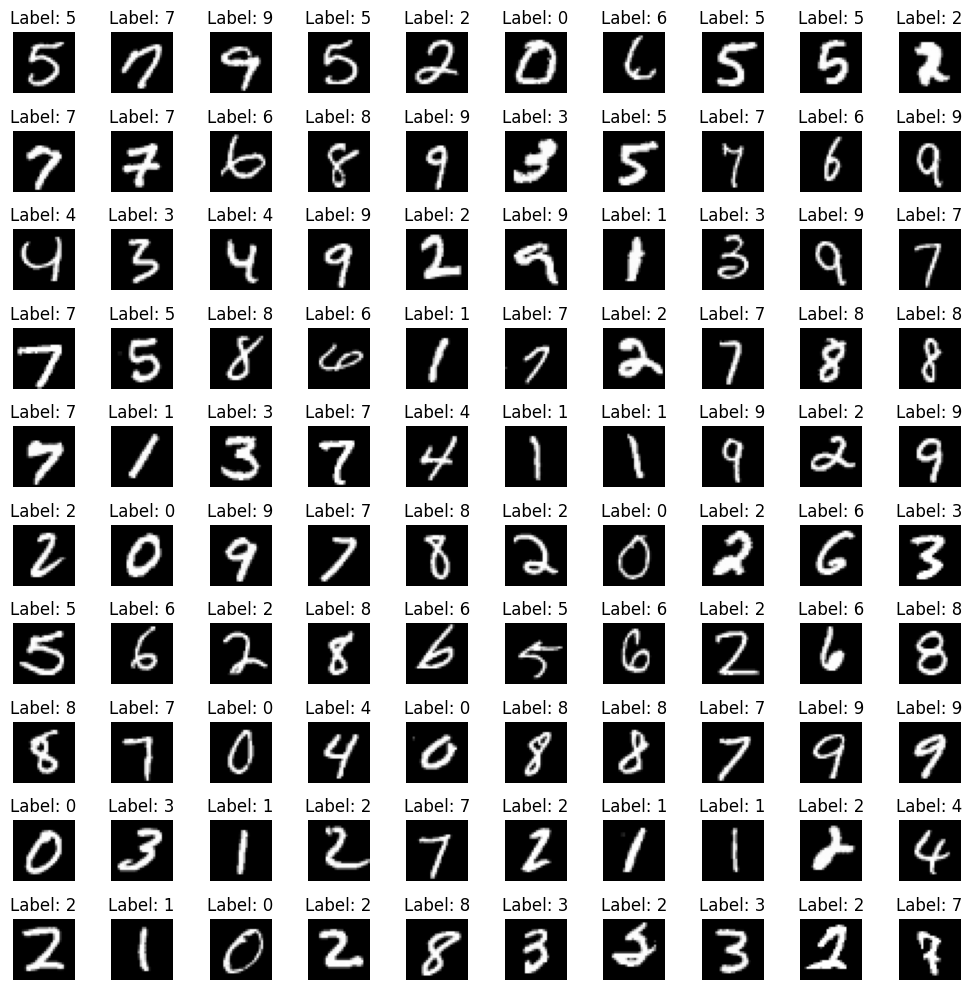

In [ ]:
X_train_images = mnist_train_df.iloc[:, 1:].values.reshape(-1, 28, 28)
y_train_images = mnist_train_df.iloc[:, 0].values

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train_images[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_mnist_train = mnist_train_df.iloc[:4000, 1:].values
y_mnist_train = mnist_train_df.iloc[:4000, 0].values

X_mnist_test = mnist_test_df.iloc[:1000, 1:].values
y_mnist_test = mnist_test_df.iloc[:1000, 0].values

In [ ]:
scaler_mnist = StandardScaler()
X_mnist_train_scaled = scaler_mnist.fit_transform(X_mnist_train)
X_mnist_test_scaled = scaler_mnist.transform(X_mnist_test)

In [ ]:
X_train_mnist = X_mnist_train_scaled
X_test_mnist = X_mnist_test_scaled
y_train_mnist = y_mnist_train
y_test_mnist = y_mnist_test

In [ ]:
svm_models_mnist = {
    'linear': SVC(kernel='linear', random_state=40),
    'poly': SVC(kernel='poly', random_state=40),
    'rbf': SVC(kernel='rbf', random_state=40),
    'sigmoid': SVC(kernel='sigmoid', random_state=40)
}

for kernel, model in svm_models_mnist.items():
    model.fit(X_train_mnist, y_train_mnist)

In [ ]:
results_mnist = {}
for kernel, model in svm_models_mnist.items():
    y_pred_mnist = model.predict(X_test_mnist)
    accuracy_mnist = accuracy_score(y_test_mnist, y_pred_mnist)
    precision_mnist = precision_score(y_test_mnist, y_pred_mnist, average='macro', zero_division=0)
    recall_mnist = recall_score(y_test_mnist, y_pred_mnist, average='macro', zero_division=0)
    f1_mnist = f1_score(y_test_mnist, y_pred_mnist, average='macro', zero_division=0)

    results_mnist[kernel] = {
        'accuracy': accuracy_mnist,
        'precision': precision_mnist,
        'recall': recall_mnist,
        'f1_score': f1_mnist
    }

print("\nEvaluation Results (MNIST Data):")
for kernel, metrics in results_mnist.items():
    print(f"\n{kernel} Kernel:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Evaluation Results (MNIST Data):

linear Kernel:
  accuracy: 0.8970
  precision: 0.8960
  recall: 0.8957
  f1_score: 0.8952

poly Kernel:
  accuracy: 0.7930
  precision: 0.8567
  recall: 0.7897
  f1_score: 0.7972

rbf Kernel:
  accuracy: 0.9140
  precision: 0.9141
  recall: 0.9127
  f1_score: 0.9131

sigmoid Kernel:
  accuracy: 0.8870
  precision: 0.8846
  recall: 0.8847
  f1_score: 0.8844


## SVR

In [ ]:
real_estate_df = pd.read_csv('/content/real_estate.csv')
display(real_estate_df.head())

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [ ]:
missing_values_real_estate = real_estate_df.isnull().sum()
print("Missing values in real estate dataset:")
print(missing_values_real_estate)

print("\nData types of real estate dataset columns:")
print(real_estate_df.dtypes)

Missing values in real estate dataset:
Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

Data types of real estate dataset columns:
Property_Name     object
Location          object
Region            object
Property_Age      object
Availability      object
Area_Tpye         object
Area_SqFt        float64
Rate_SqFt          int64
Floor_No           int64
Bedroom            int64
Bathroom           int64
Price_Lakh       float64
dtype: object


In [ ]:
X_real_estate = real_estate_df[['Area_SqFt', 'Rate_SqFt', 'Floor_No', 'Bedroom', 'Bathroom']]
y_real_estate = real_estate_df['Price_Lakh']

X_train_real_estate, X_test_real_estate, y_train_real_estate, y_test_real_estate = train_test_split(
    X_real_estate, y_real_estate, test_size=0.2, random_state=42
)

print("Shape of X_train_real_estate:", X_train_real_estate.shape)
print("Shape of X_test_real_estate:", X_test_real_estate.shape)
print("Shape of y_train_real_estate:", y_train_real_estate.shape)
print("Shape of y_test_real_estate:", y_test_real_estate.shape)

Shape of X_train_real_estate: (2024, 5)
Shape of X_test_real_estate: (507, 5)
Shape of y_train_real_estate: (2024,)
Shape of y_test_real_estate: (507,)


In [ ]:
scaler_real_estate = StandardScaler()
X_train_real_estate_scaled = scaler_real_estate.fit_transform(X_train_real_estate)
X_test_real_estate_scaled = scaler_real_estate.transform(X_test_real_estate)

X_train_real_estate = X_train_real_estate_scaled
X_test_real_estate = X_test_real_estate_scaled

print("Shape of scaled X_train_real_estate:", X_train_real_estate.shape)
print("Shape of scaled X_test_real_estate:", X_test_real_estate.shape)

Shape of scaled X_train_real_estate: (2024, 5)
Shape of scaled X_test_real_estate: (507, 5)


In [ ]:
svr_models = {
    'linear': SVR(kernel='linear'),
    'poly': SVR(kernel='poly'),
    'rbf': SVR(kernel='rbf'),
    'sigmoid': SVR(kernel='sigmoid')
}

for kernel, model in svr_models.items():
    model.fit(X_train_real_estate, y_train_real_estate)

In [ ]:
results_svr = {}
for kernel, model in svr_models.items():
    y_pred_real_estate = model.predict(X_test_real_estate)
    mse = mean_squared_error(y_test_real_estate, y_pred_real_estate)
    mae = mean_absolute_error(y_test_real_estate, y_pred_real_estate)
    r2 = r2_score(y_test_real_estate, y_pred_real_estate)

    results_svr[kernel] = {
        'mse': mse,
        'mae': mae,
        'r2_score': r2
    }

print("\nEvaluation Results (Real Estate Data):")
for kernel, metrics in results_svr.items():
    print(f"\n{kernel} Kernel:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Evaluation Results (Real Estate Data):

linear Kernel:
  mse: 6588.7672
  mae: 34.8442
  r2_score: 0.7889

poly Kernel:
  mse: 6060.8689
  mae: 50.2460
  r2_score: 0.8059

rbf Kernel:
  mse: 20821.5489
  mae: 49.6060
  r2_score: 0.3330

sigmoid Kernel:
  mse: 16570.3877
  mae: 47.7959
  r2_score: 0.4692
